In [2]:
pip uninstall twint

In [3]:
pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [4]:
import twint
import nest_asyncio
nest_asyncio.apply()

from datetime import timedelta
from string import ascii_letters, digits
from os import mkdir, path
from glob import glob

In [17]:
c = twint.Config()

c.Search = "covid", "anxiety"
c.Lang = "en"
c.Limit = 100

#c.Custom_csv = ["id", "user_id", "username", "tweet"]
c.Store_json = True
c.Output = "twitter.json"
twint.run.Search(c)

In [13]:
import pandas as pd

In [20]:
df = pd.read_json('twitter.json', lines=True)
#op= pd.read_json('twitter.json')
df.head()

In [22]:
#display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head()

In [30]:
df.drop(['conversation_id','created_at','timezone','user_id','username','name','place'], inplace=True, axis=1)
df.head()

In [31]:
df.drop(['language','mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','cashtags','link','retweet','quote_url','video','thumbnail' ,'near','geo','source','user_rt_id' ,'user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest'], inplace=True, axis=1)
df.head()

In [67]:
df.drop_duplicates(subset=None, keep='first', inplace=False)
df.head()

In [34]:
df.shape

In [37]:
#importing necessary libraries
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

In [40]:
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [42]:
df['tweet'].head(10)

In [45]:
#rename tweet column as text
df.rename(columns={"tweet": "text"}, inplace=True)
df.columns

In [47]:
#cleaning tweets
corpus = []
for i in range(0, 100):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', df['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [50]:
from wordcloud import STOPWORDS
from PIL import Image

In [53]:
#Part-5: Visualization

#Word Cloud
#all_words = ' '.join([text for text in corpus])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
mask = np.array(Image.open('../input/twitterlogo/twitter.jpg'))
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(background_color='#004481',colormap='Pastel1',mask=mask,
                      contour_width=1, contour_color='white'
                      ,collocations=False,stopwords=STOPWORDS,
                      width=800, height=500, random_state=21,
                      ).generate(all_words)
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

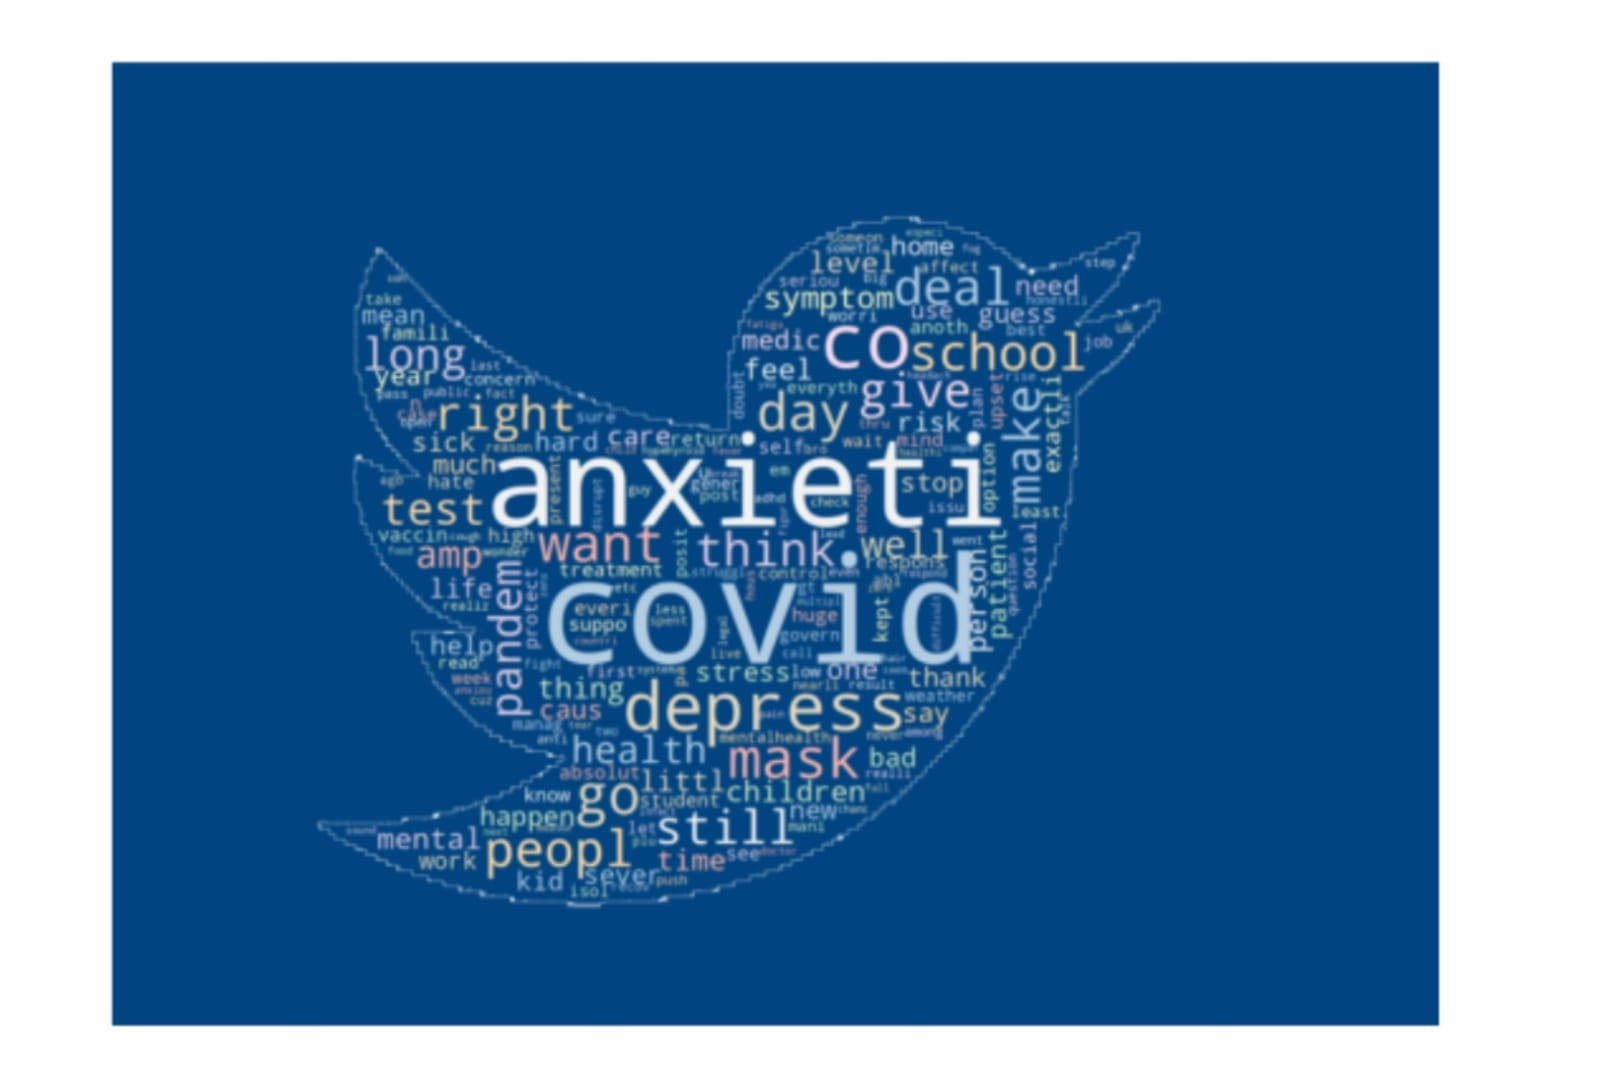
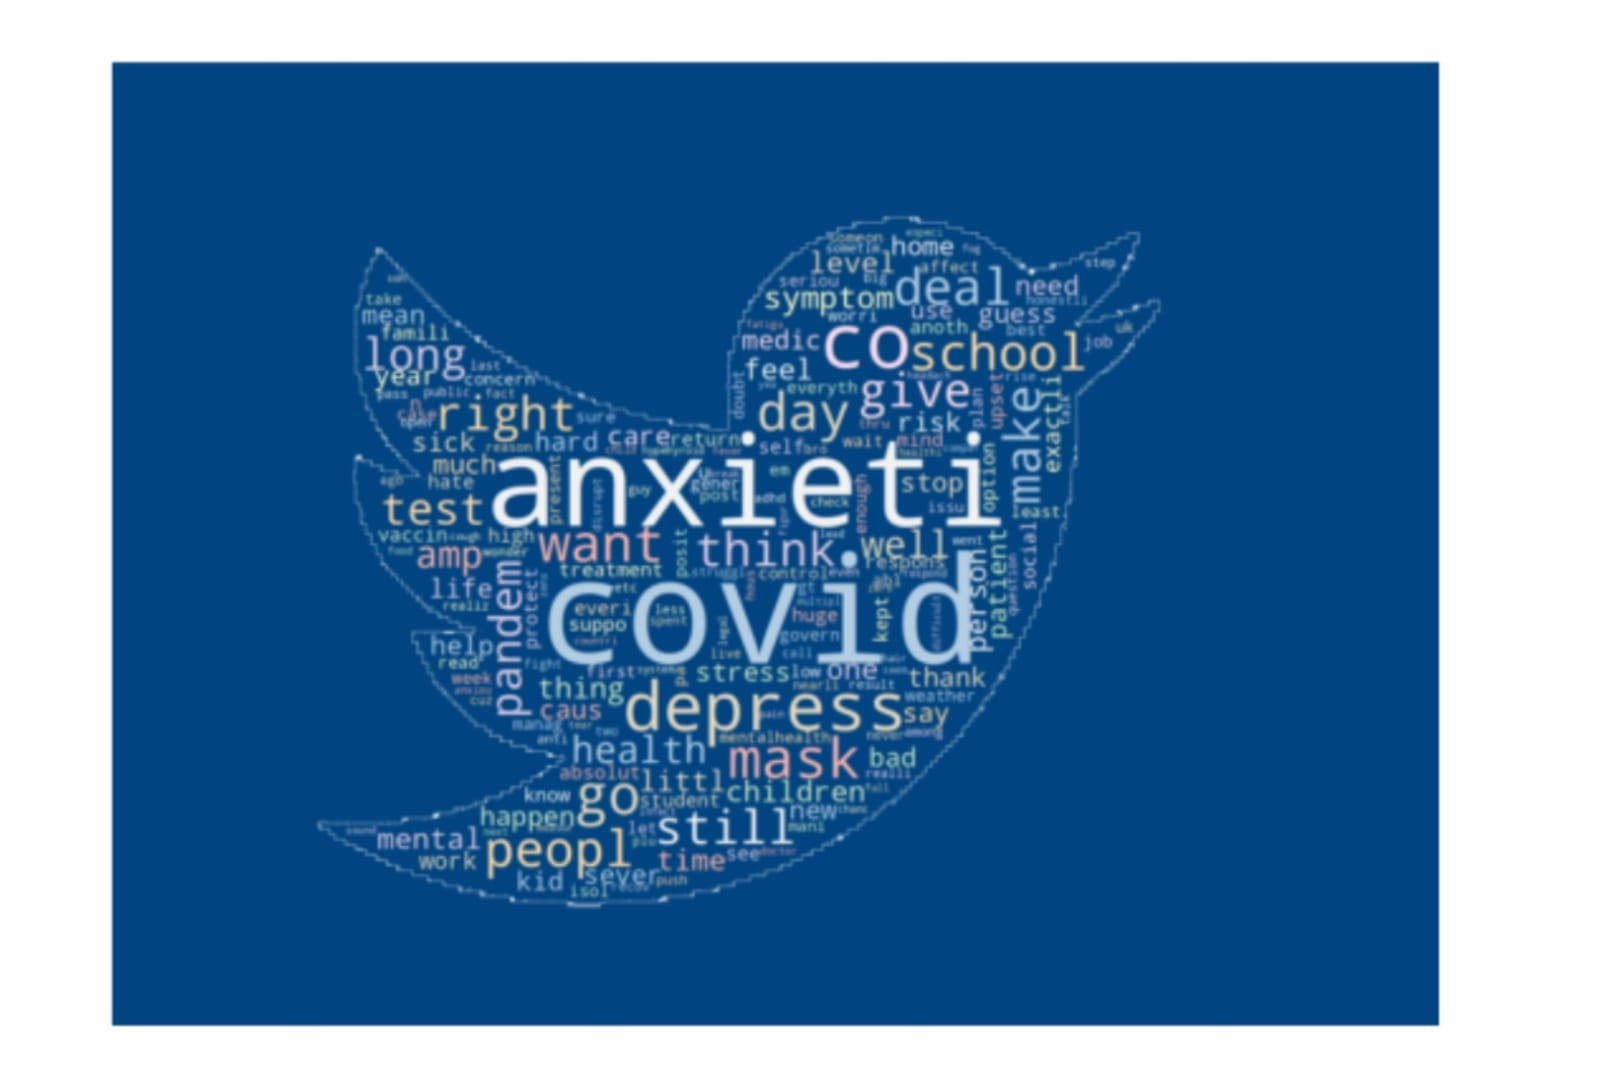

In [54]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

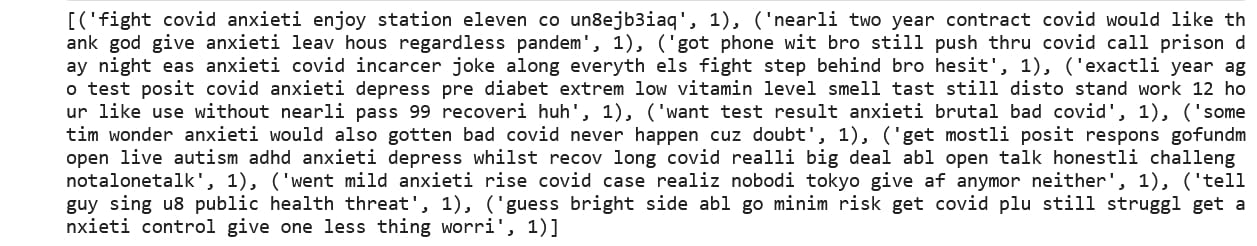
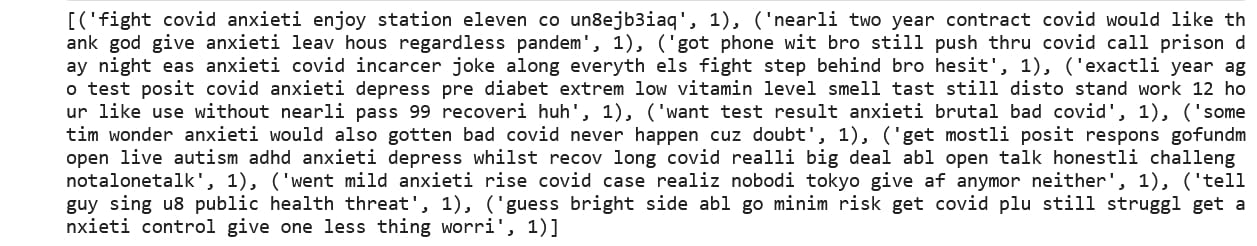

In [55]:
df.to_csv('/kaggle/working/twintTweets.csv')

****EDITING TWEEPY-EXTRACTED DATASET****

In [60]:
dataa = pd.read_csv('../input/tweepydata/tweet_data.csv')

In [61]:
dataa.head(15)

In [64]:
dataa.drop(['Unnamed: 0','tweet_id','favorite_count','retweet_count','created_at'], inplace=True, axis=1)
dataa.head()

In [66]:
dataa.drop_duplicates(subset=None, keep='first', inplace=False)
dataa.head()

In [68]:
dataa.shape

In [71]:
dataa.to_csv('/kaggle/working/tweepyTweets.csv')

In [81]:
#merge both into one csv file
new = pd.concat(
    map(pd.read_csv, ['tweepyTweets.csv', 'twintTweets.csv']), ignore_index=True)
new.drop(['Unnamed: 0'], inplace=True, axis=1)
new.head()

In [82]:
new.to_csv('/kaggle/working/newDataset.csv',index = False)